# Introduction

In introduction, we'll see how to make a figure displaying the sine and cosine functions and play with the different settings such as to improve the display of the figure using matplotlib settings. During this first exercise, we'll manipulate axes, ticks, tick labels, lines, colors, texts and annotations.

---

## Data preparation
The first step is to get the data for the sine and cosine functions.

In [1]:
import numpy as np

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

X is now a Numpy array with 256 values ranging from -π to +π (included). C is the cosine (256 values) and S is the sine (256 values). We're ready to plot them.

## Implicit defaults

Matplotlib allows you to customize any aspect of a figure: size, line width, color and style, axes, axis and grid properties, text and font properties, etc. To save you the trouble of specifying every aspect of the figure, Matplotlib uses a set of default values.
Let's see what they looks like by plotting our sine and cosine functions.

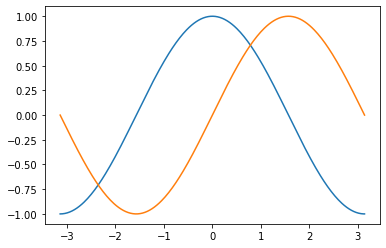

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C)
plt.plot(X, S)
plt.show()

## Explicit defaults

Let's now try to do the exact same figure as above, but this time we'll specify everything. To do so, we need to read these defaults from the `maplotlibrc` configuration file that is accessible through the `plt.rcParams` variable. 

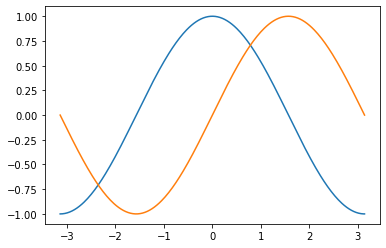

In [3]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C = np.cos(X) 
S = np.sin(X)
p = plt.rcParams

fig = plt.figure(figsize = p['figure.figsize'],
                 dpi = p['figure.dpi'],
                 facecolor = p['figure.facecolor'],
                 edgecolor = p['figure.edgecolor'],
                 frameon = p['figure.frameon'])

ax = plt.subplot()
                   
ax.plot(X, C, color="C0",
              linewidth = p['lines.linewidth'],
              linestyle = p['lines.linestyle'])

ax.plot(X, S, color="C1",
              linewidth = p['lines.linewidth'],
              linestyle = p['lines.linestyle'])

xmin, xmax = X.min(), X.max()
xmargin = p['axes.xmargin']*(xmax - xmin)
ax.set_xlim(xmin - xmargin, xmax + xmargin)

ymin, ymax = min(C.min(), S.min()), max(C.max(), S.max())
ymargin = p['axes.ymargin']*(ymax - ymin)
ax.set_ylim(ymin - ymargin, ymax + ymargin)

ax.tick_params(axis = "x", which="major",
               direction = p['xtick.direction'],
               length = p['xtick.major.size'],
               width = p['xtick.major.width'])

ax.tick_params(axis = "y", which="major",
               direction = p['ytick.direction'],
               length = p['ytick.major.size'],
               width = p['ytick.major.width'])

plt.show()

## Custom settings

As you can see from the script above, pretty much everything can be changed. So let's modify our figure to improve the rendering a bit. Now that we know what are the defaults, we can get back to the implicit version.

### Figure size

The plot appears a bit packed so let's first modify the figure size.
To do so, we need to create it explicitely in order to specify a size in inches. Let's try 10 inches wide and 4 inches tall. We'll also use an Axes (`ax`) which can be considered as a subfigure and we'll increase the dpi of the figure to get a better resolution in the notebook.

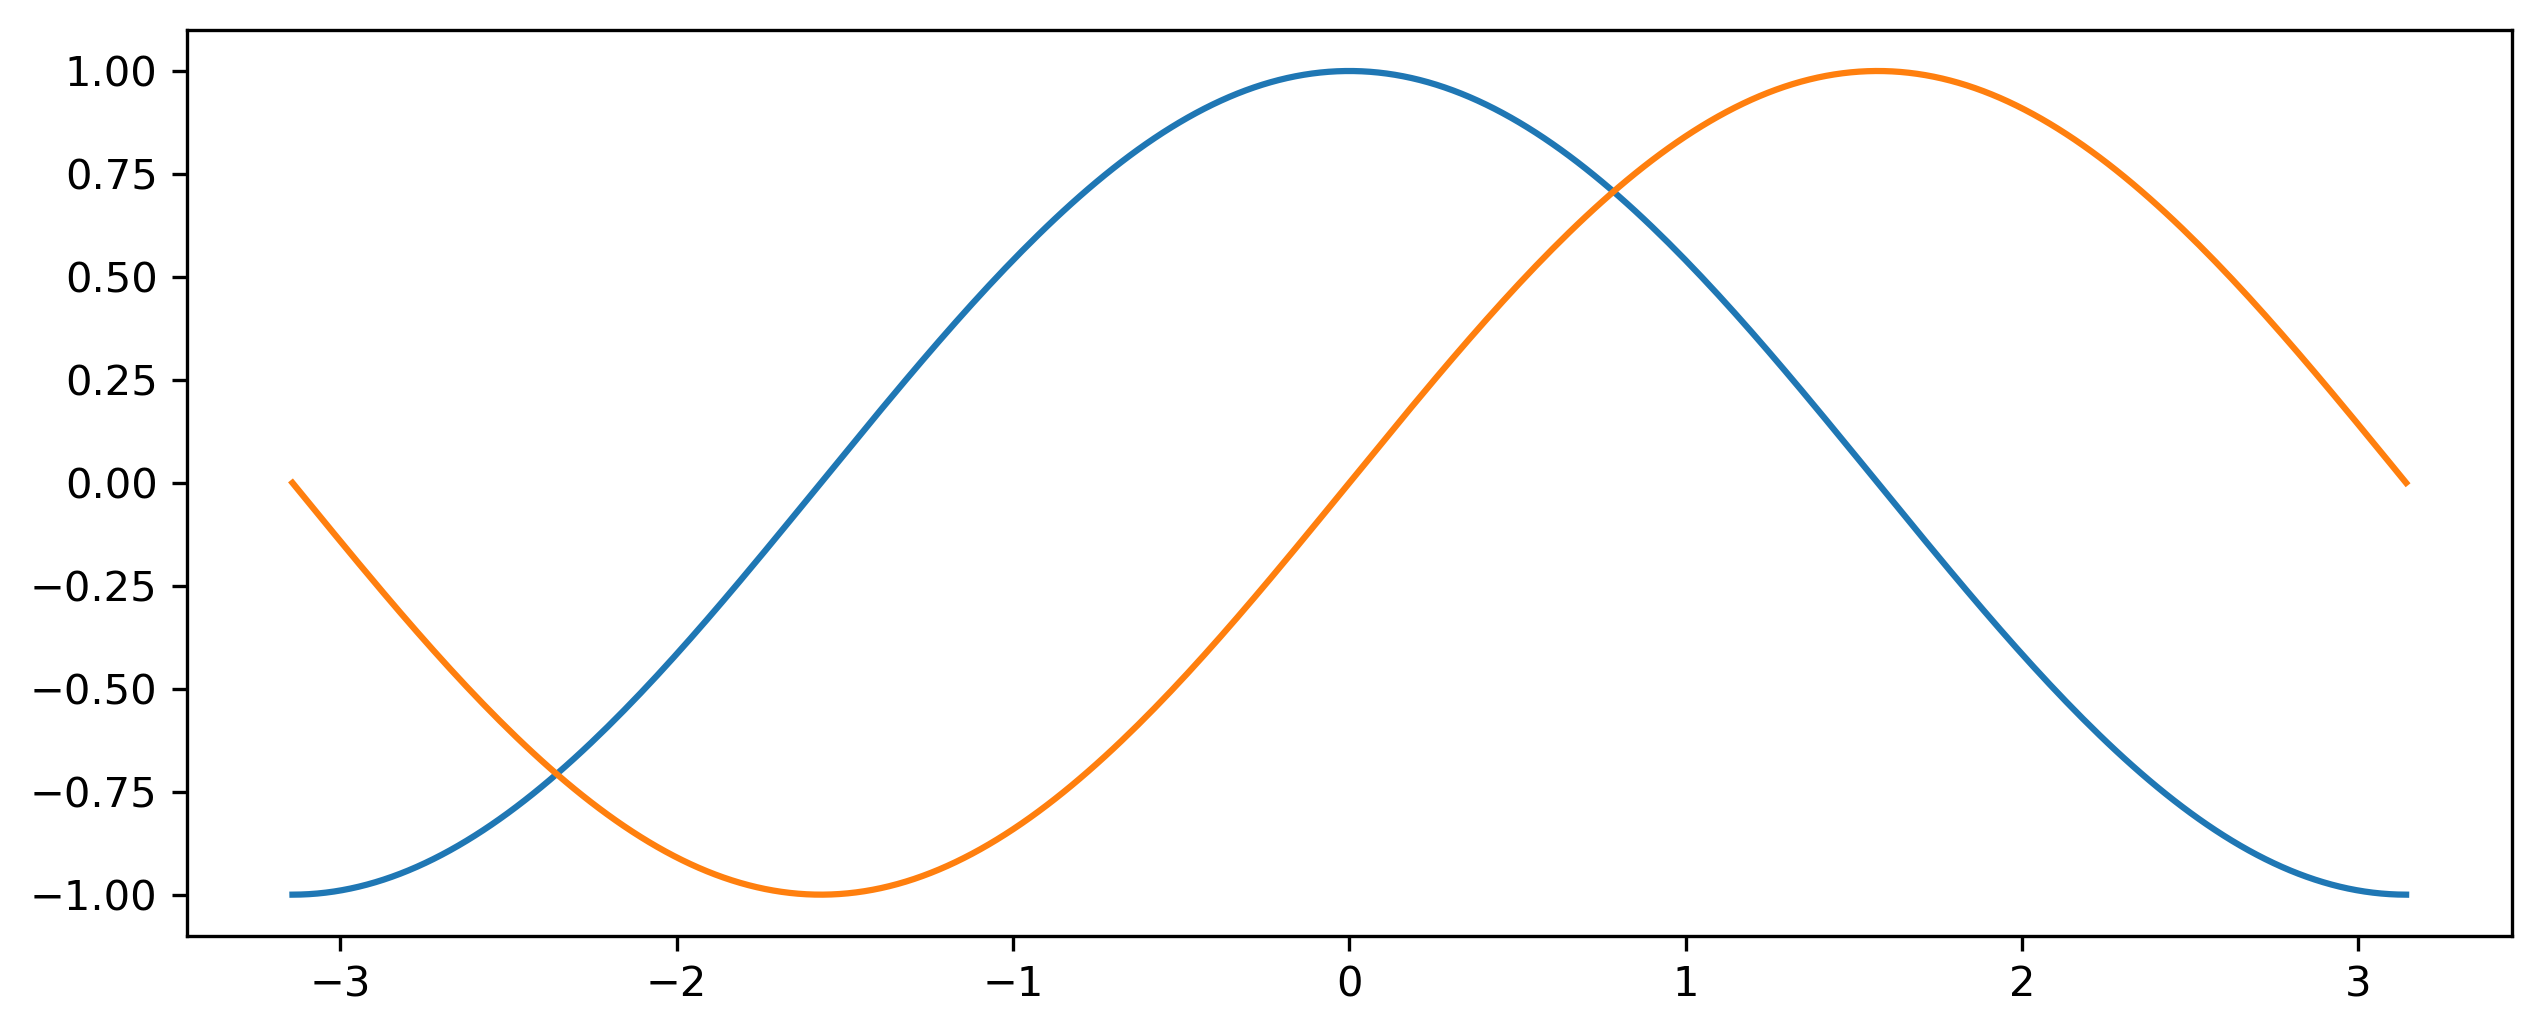

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

fig = plt.figure(figsize=(10,4), dpi=300)

ax = plt.subplot()
ax.plot(X, C)
ax.plot(X, S)

plt.show()

### Line widths

Now, let's thicken lines a bit.

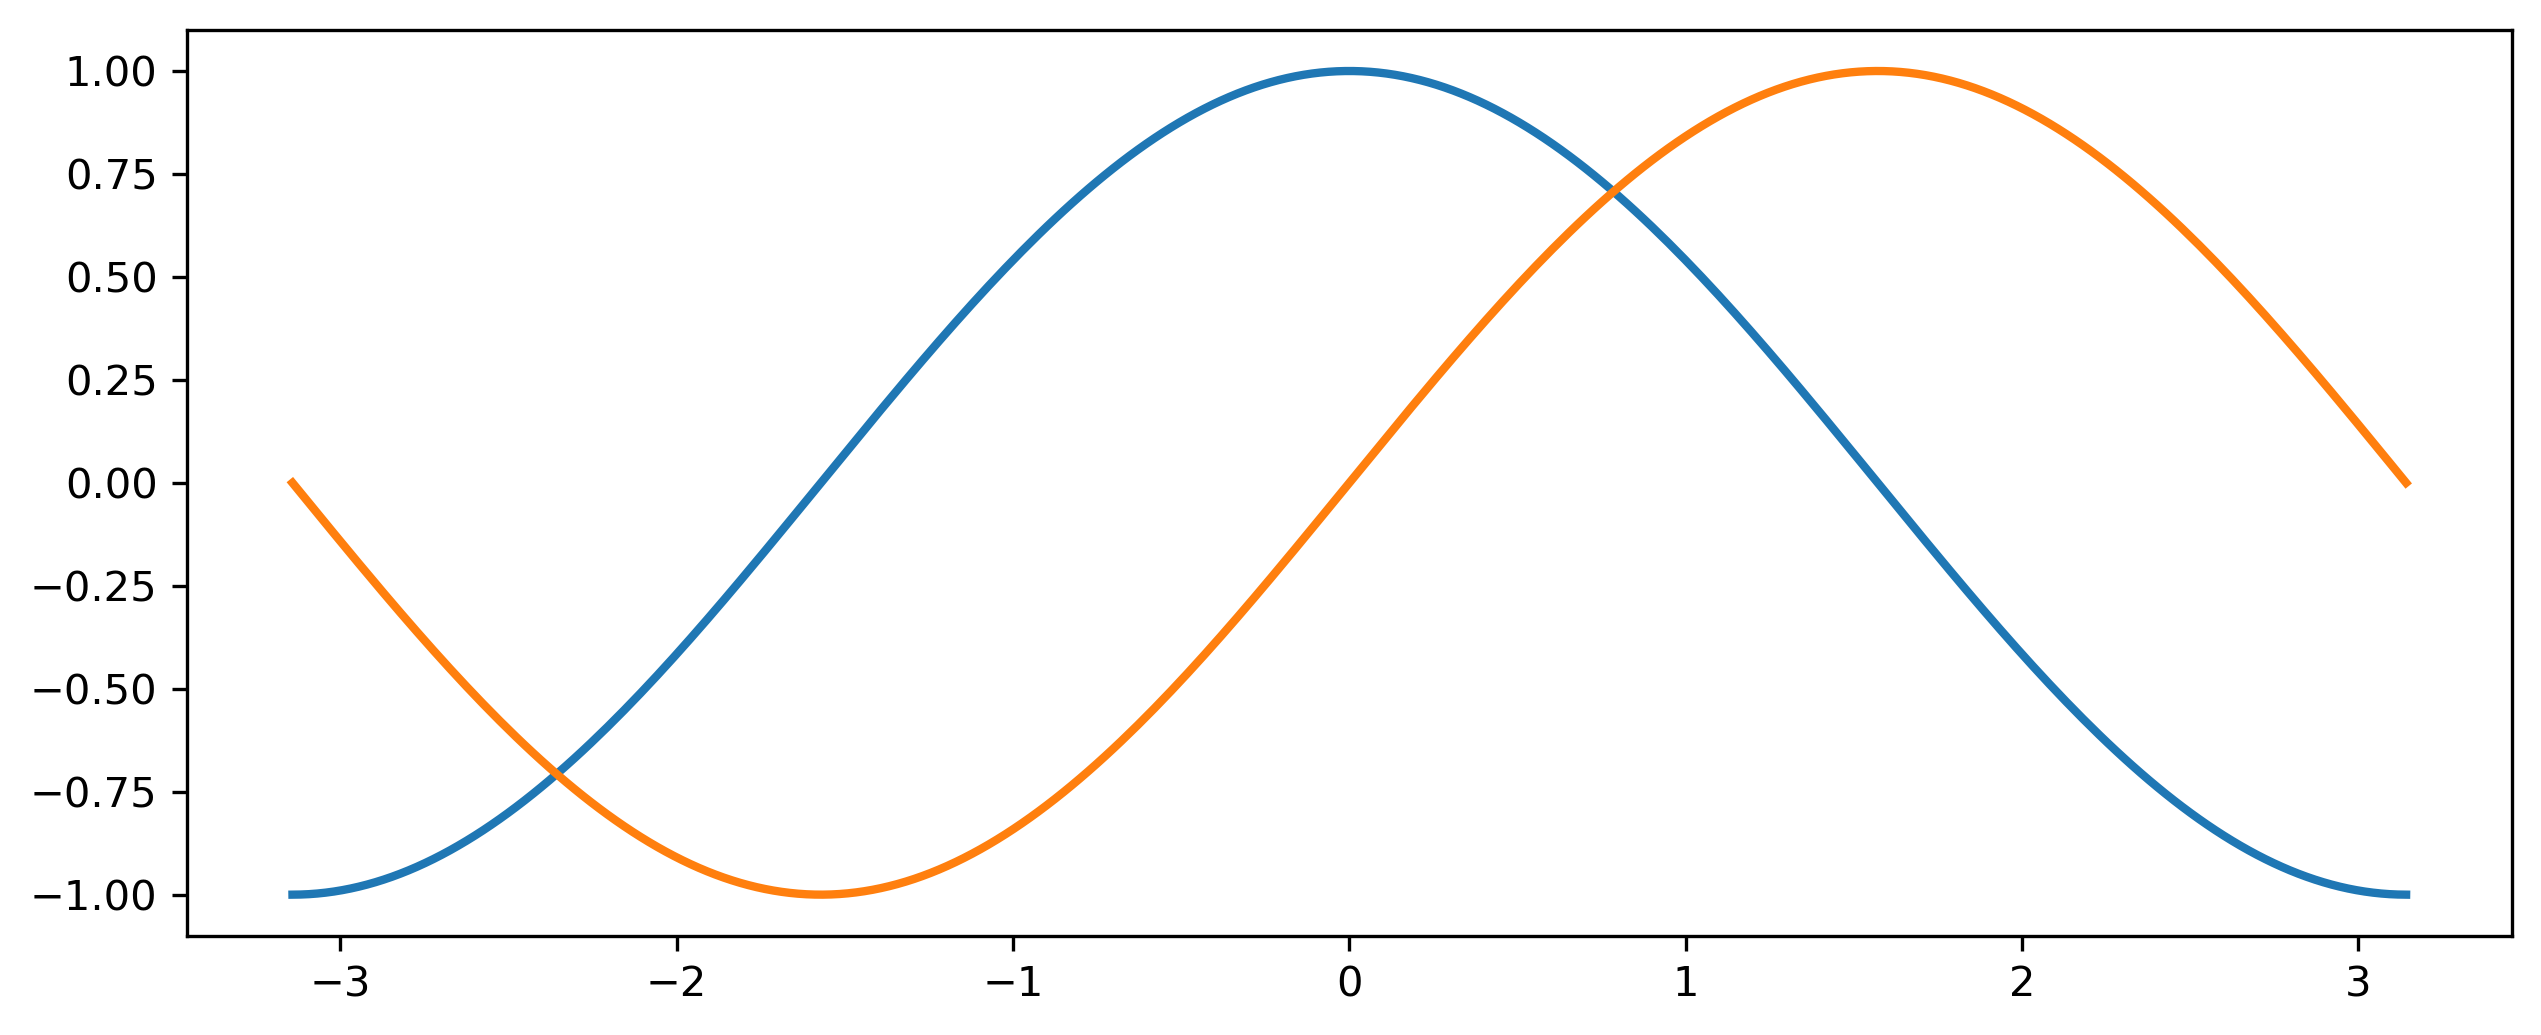

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

fig = plt.figure(figsize=(10,4), dpi=300)
ax = plt.subplot()
ax.plot(X, C, linewidth=2)
ax.plot(X, S, linewidth=2)

plt.show()

### Tick positions

Ticks on the x axis are not ideal positioned because they do not show the interesting values (+/-π,+/-π/2) and there are too many ticks on the y axis. Let's change them.

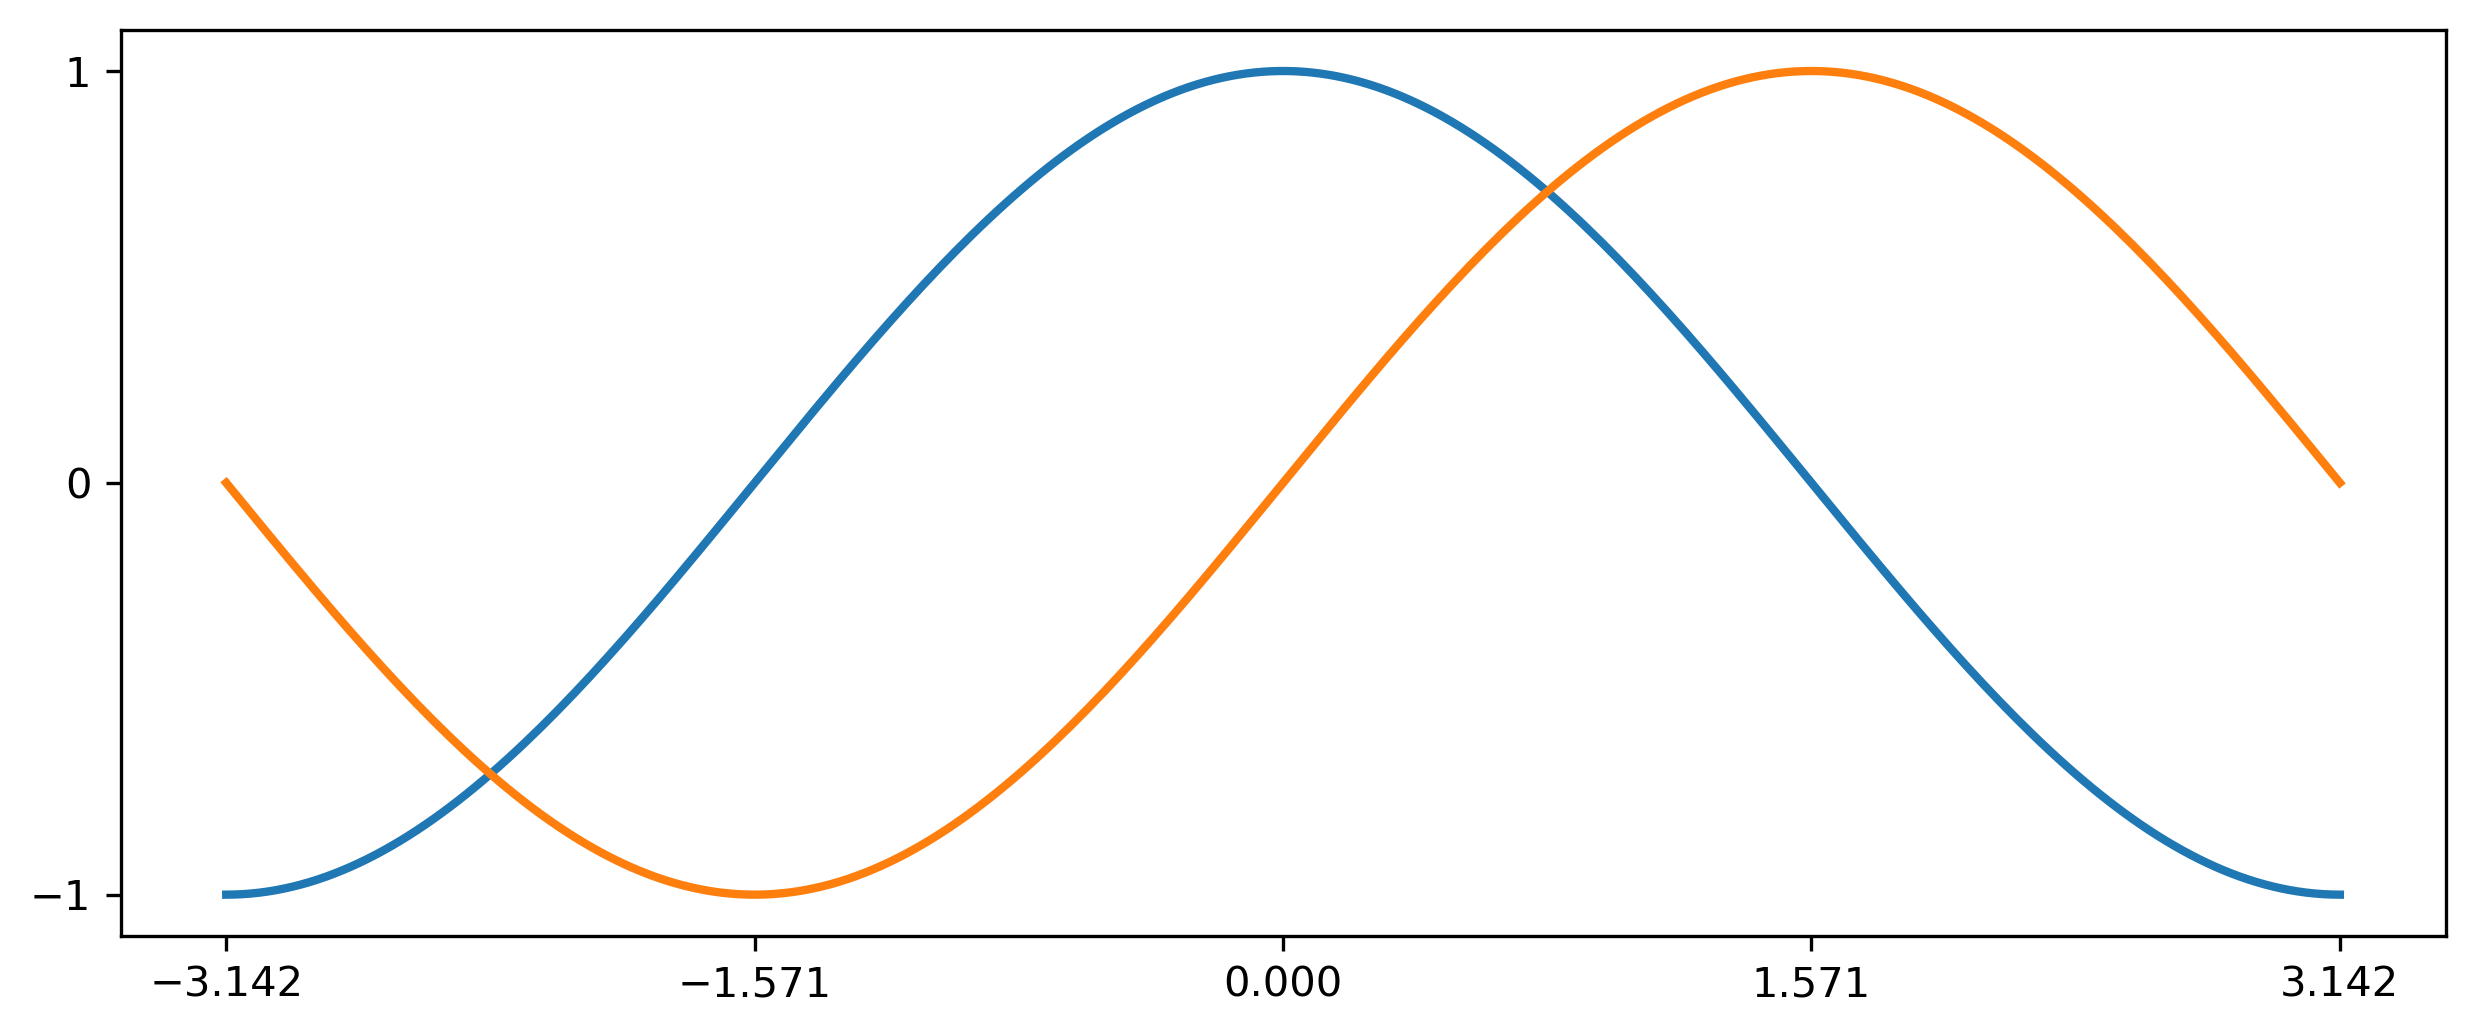

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

fig = plt.figure(figsize=(10,4), dpi=300)
ax = plt.subplot()

ax.plot(X, C, linewidth=2)
ax.plot(X, S, linewidth=2)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_yticks([-1,0,1])

plt.show()

### Tick labels

Ticks are now properly placed but their labels are not very explicit. We could guess that 3.142 is π but it would be better to make it explicit. Let's change labels then.

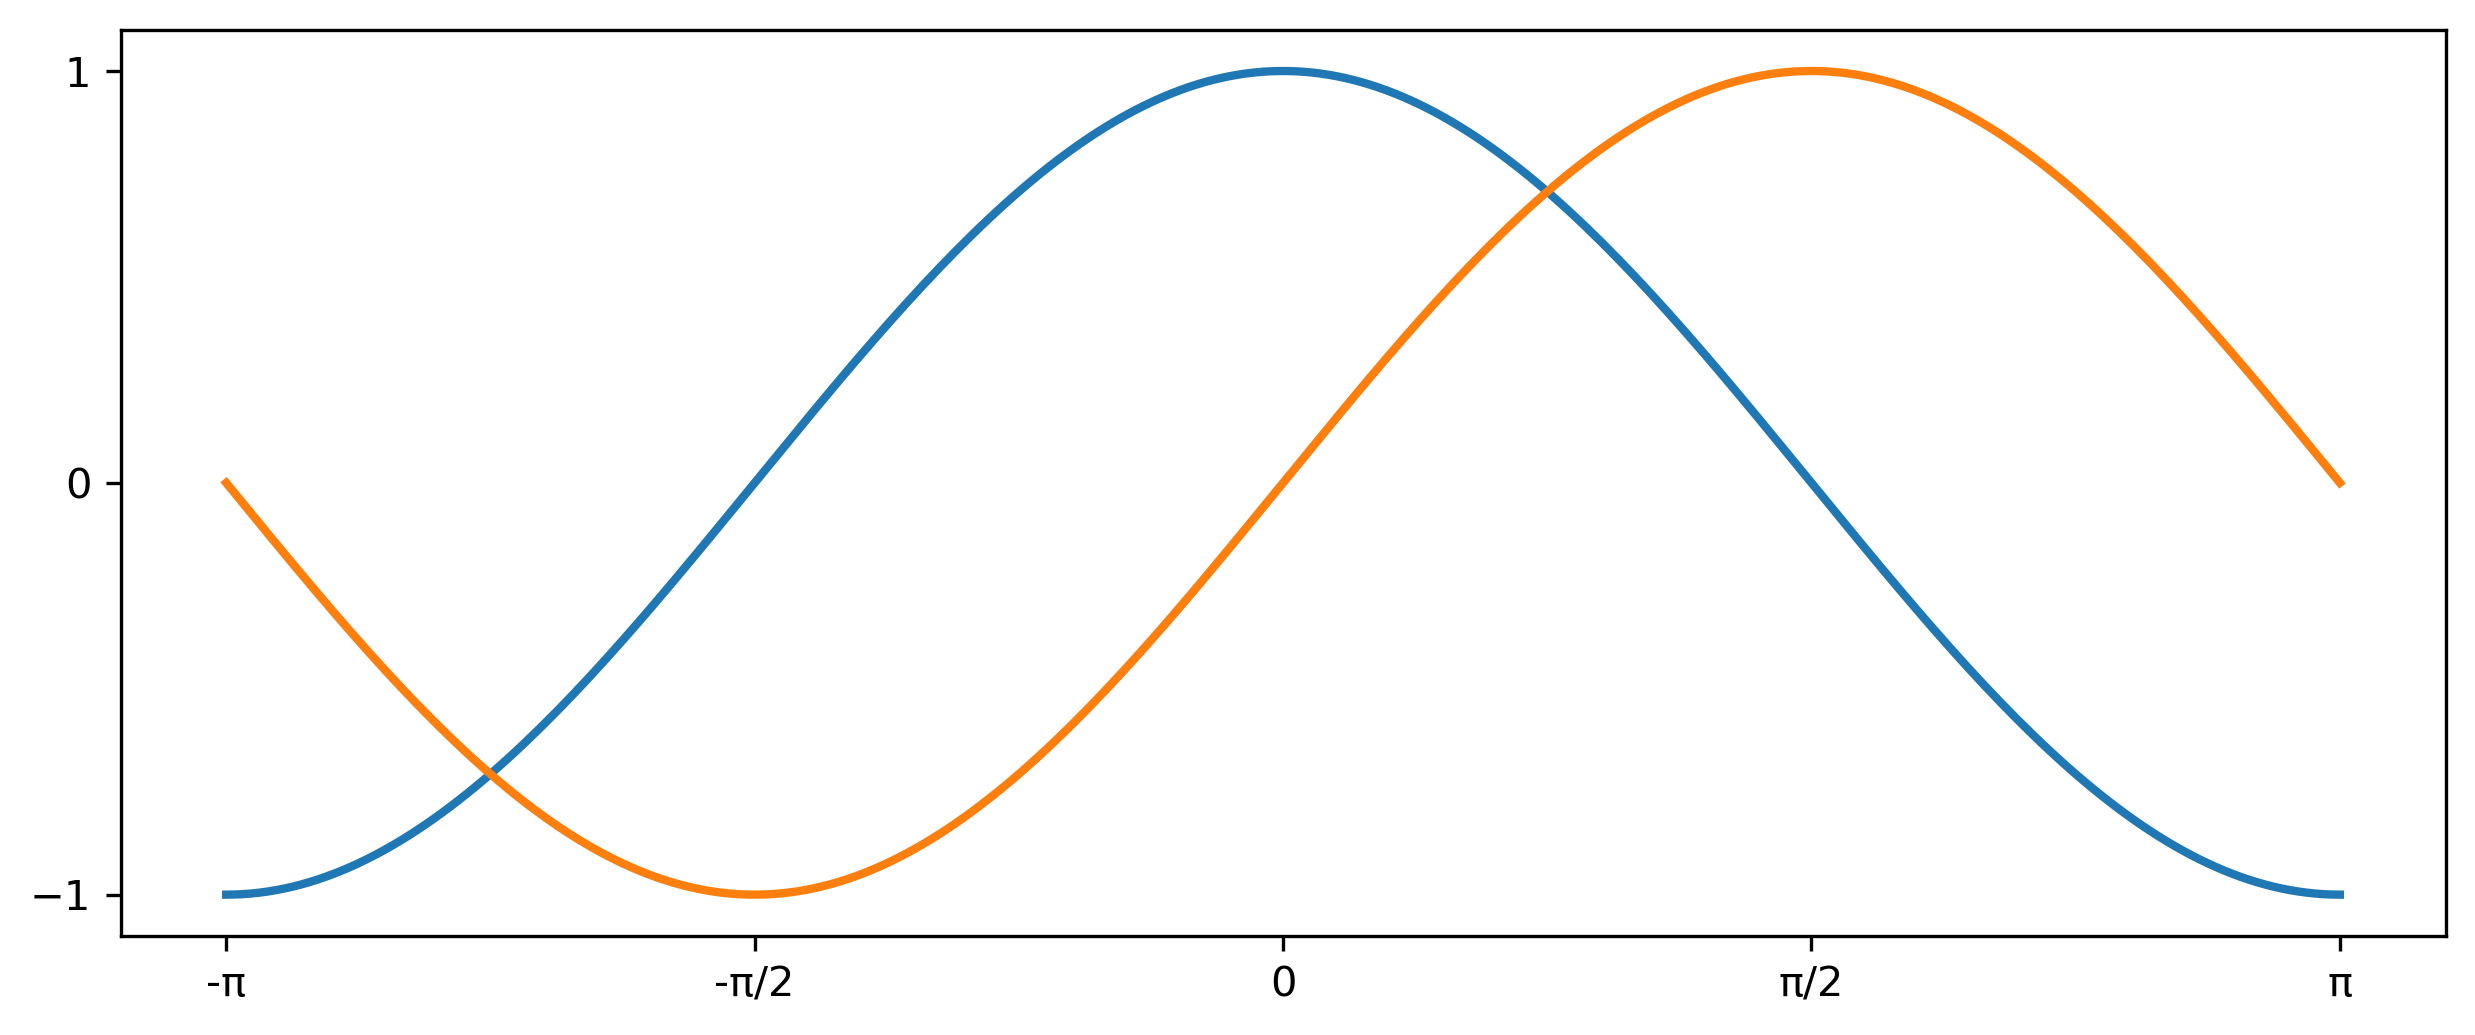

In [7]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

fig = plt.figure(figsize=(10,4), dpi=300)
ax = plt.subplot()

ax.plot(X, C, linewidth=2)
ax.plot(X, S, linewidth=2)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "0", "π/2", "π"])
ax.set_yticks([-1,0,1])

plt.show()

### Spines position

Spines are the four lines around our figure and delimiting the data area. Byt default, there are four spines at top/bottom and left/right but we can hide some of them and move the others. Since there are four of them (top/bottom/left/right), we'll hide the top and right and we'll move the bottom and left ones to coordinate 0 (in data space coordinates).

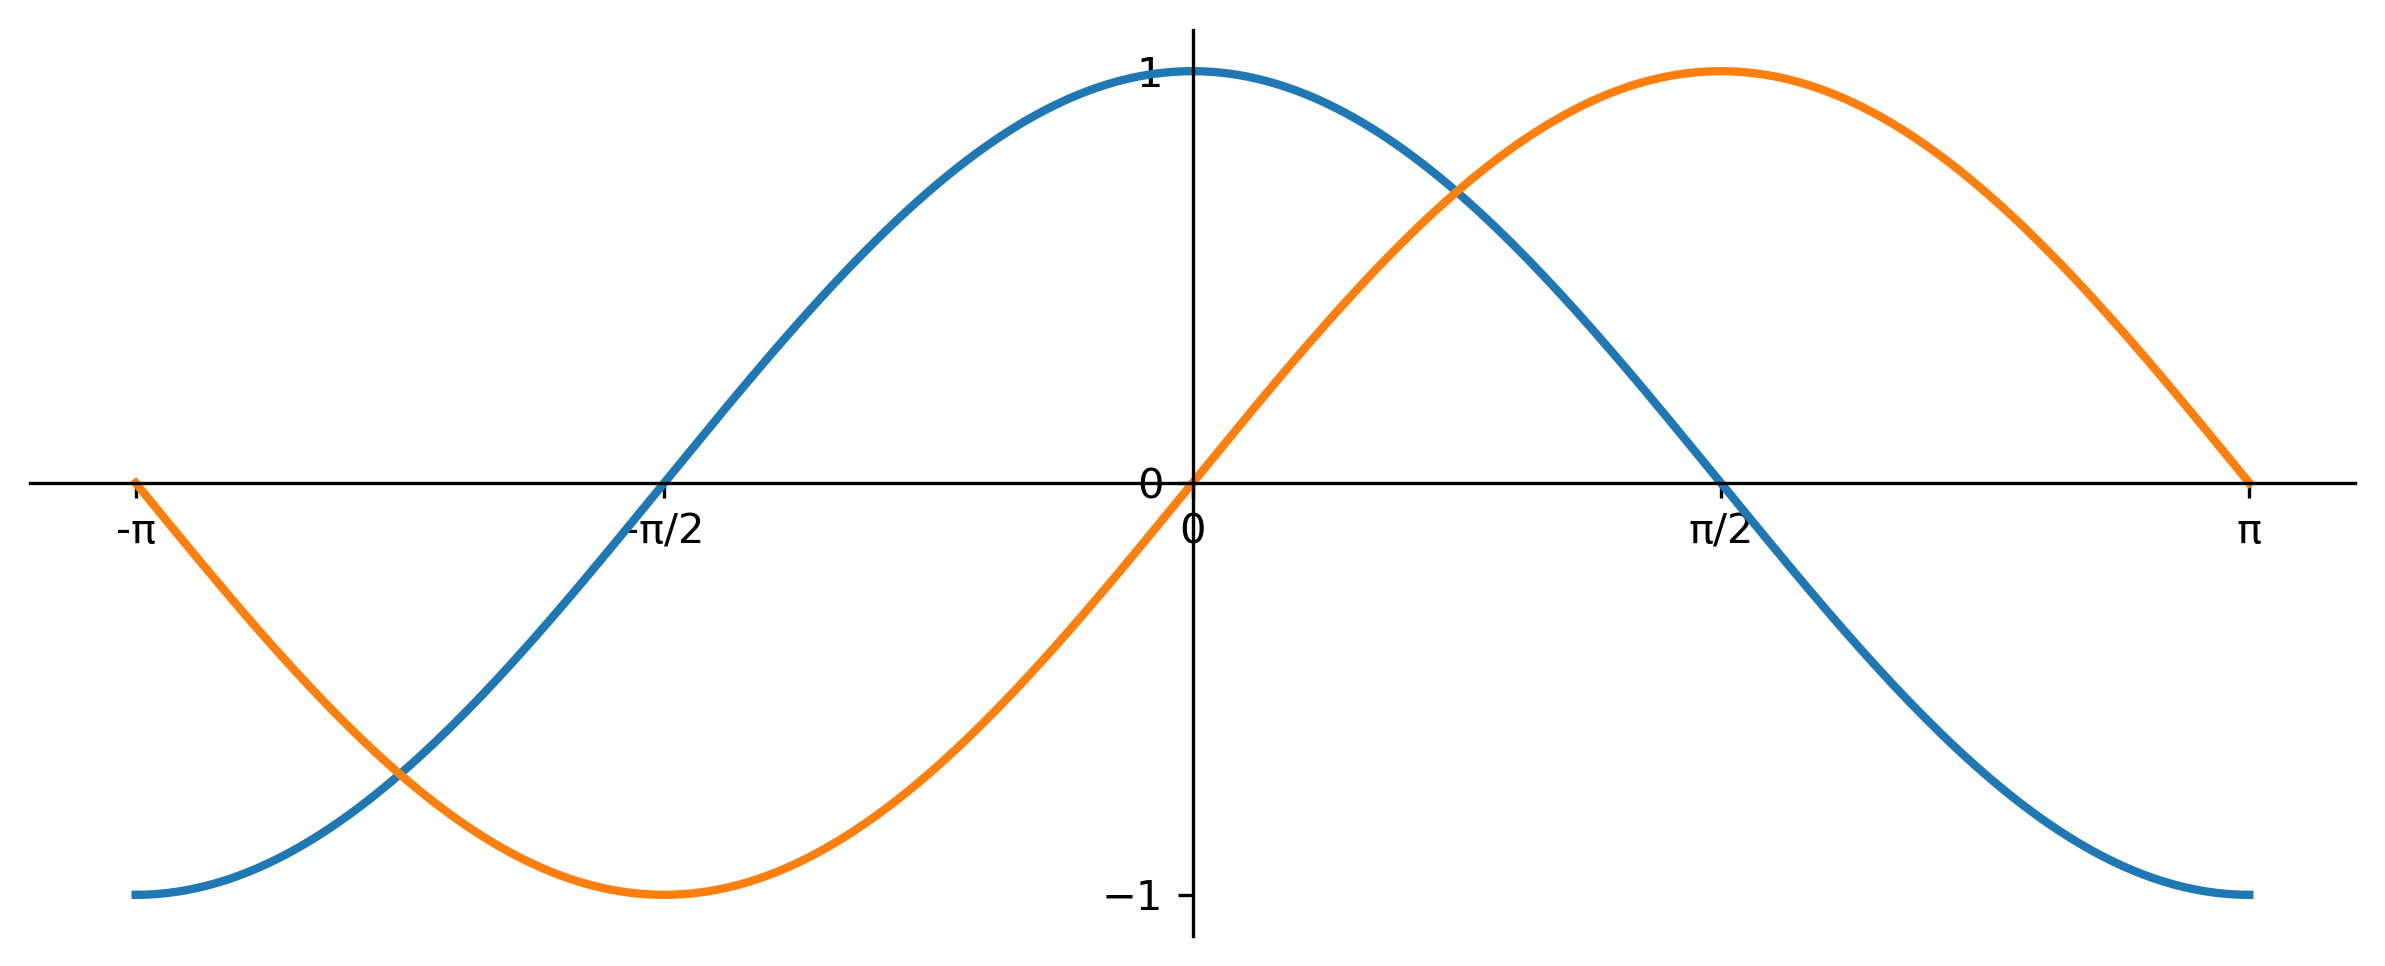

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

fig = plt.figure(figsize=(10,4), dpi=300)
ax = plt.subplot()

ax.plot(X, C, linewidth=2)
ax.plot(X, S, linewidth=2)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "0", "π/2", "π"])
ax.set_yticks([-1,0,1])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

plt.show()

### Legend

Let's add a legend in the upper left corner. This only requires adding the keyword argument `label` (that will be used in the legend box) to the plot commands.

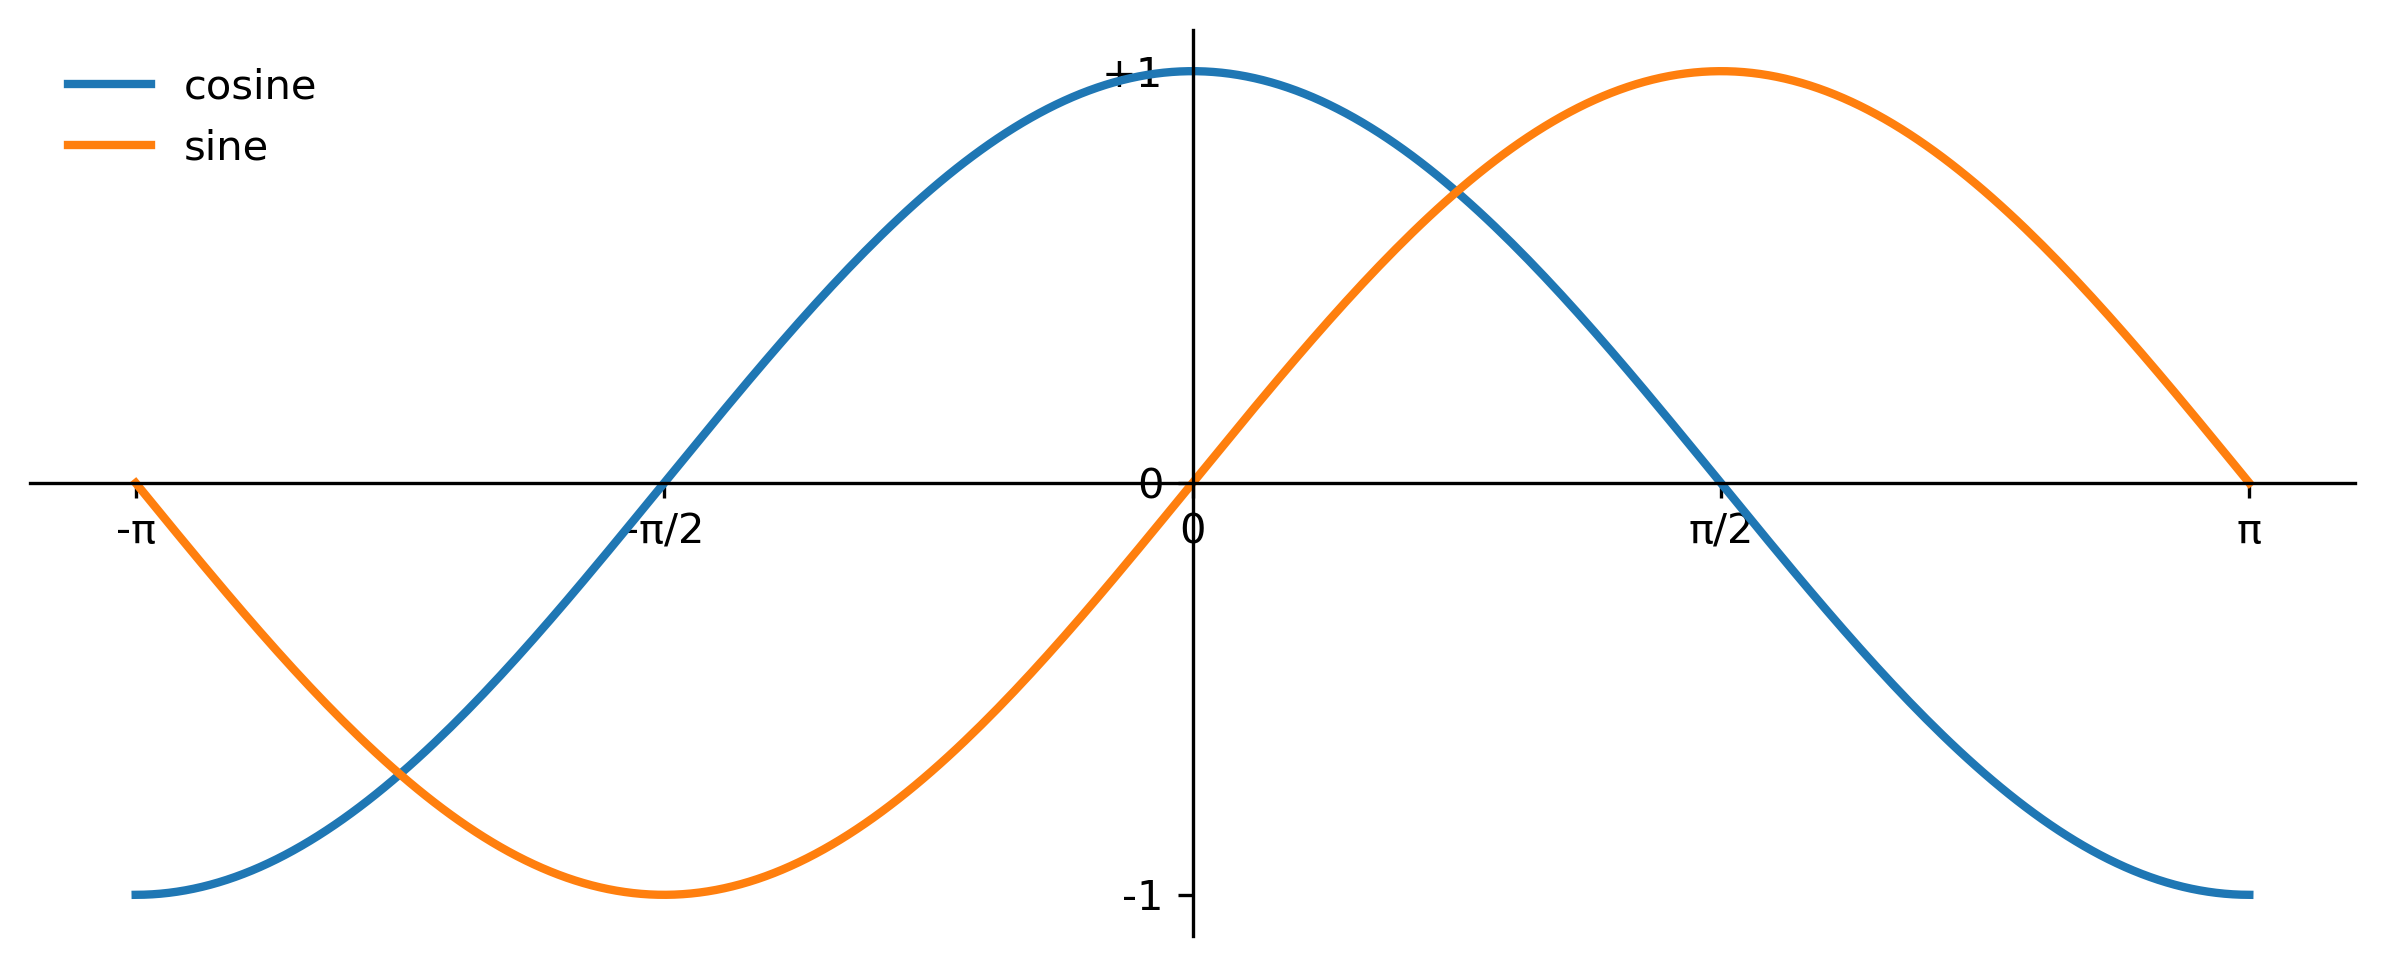

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

fig = plt.figure(figsize=(10,4), dpi=300)
ax = plt.subplot()

ax.plot(X, C, linewidth=2, label="cosine")
ax.plot(X, S, linewidth=2, label="sine")

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "0", "π/2", "π"])
ax.set_yticks([-1,0,1])
ax.set_yticklabels(["-1", "0", "+1"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper left', frameon=False)

plt.show()

### Font size

The font size of the tick labels is a bit small. Let's increase it a bit.

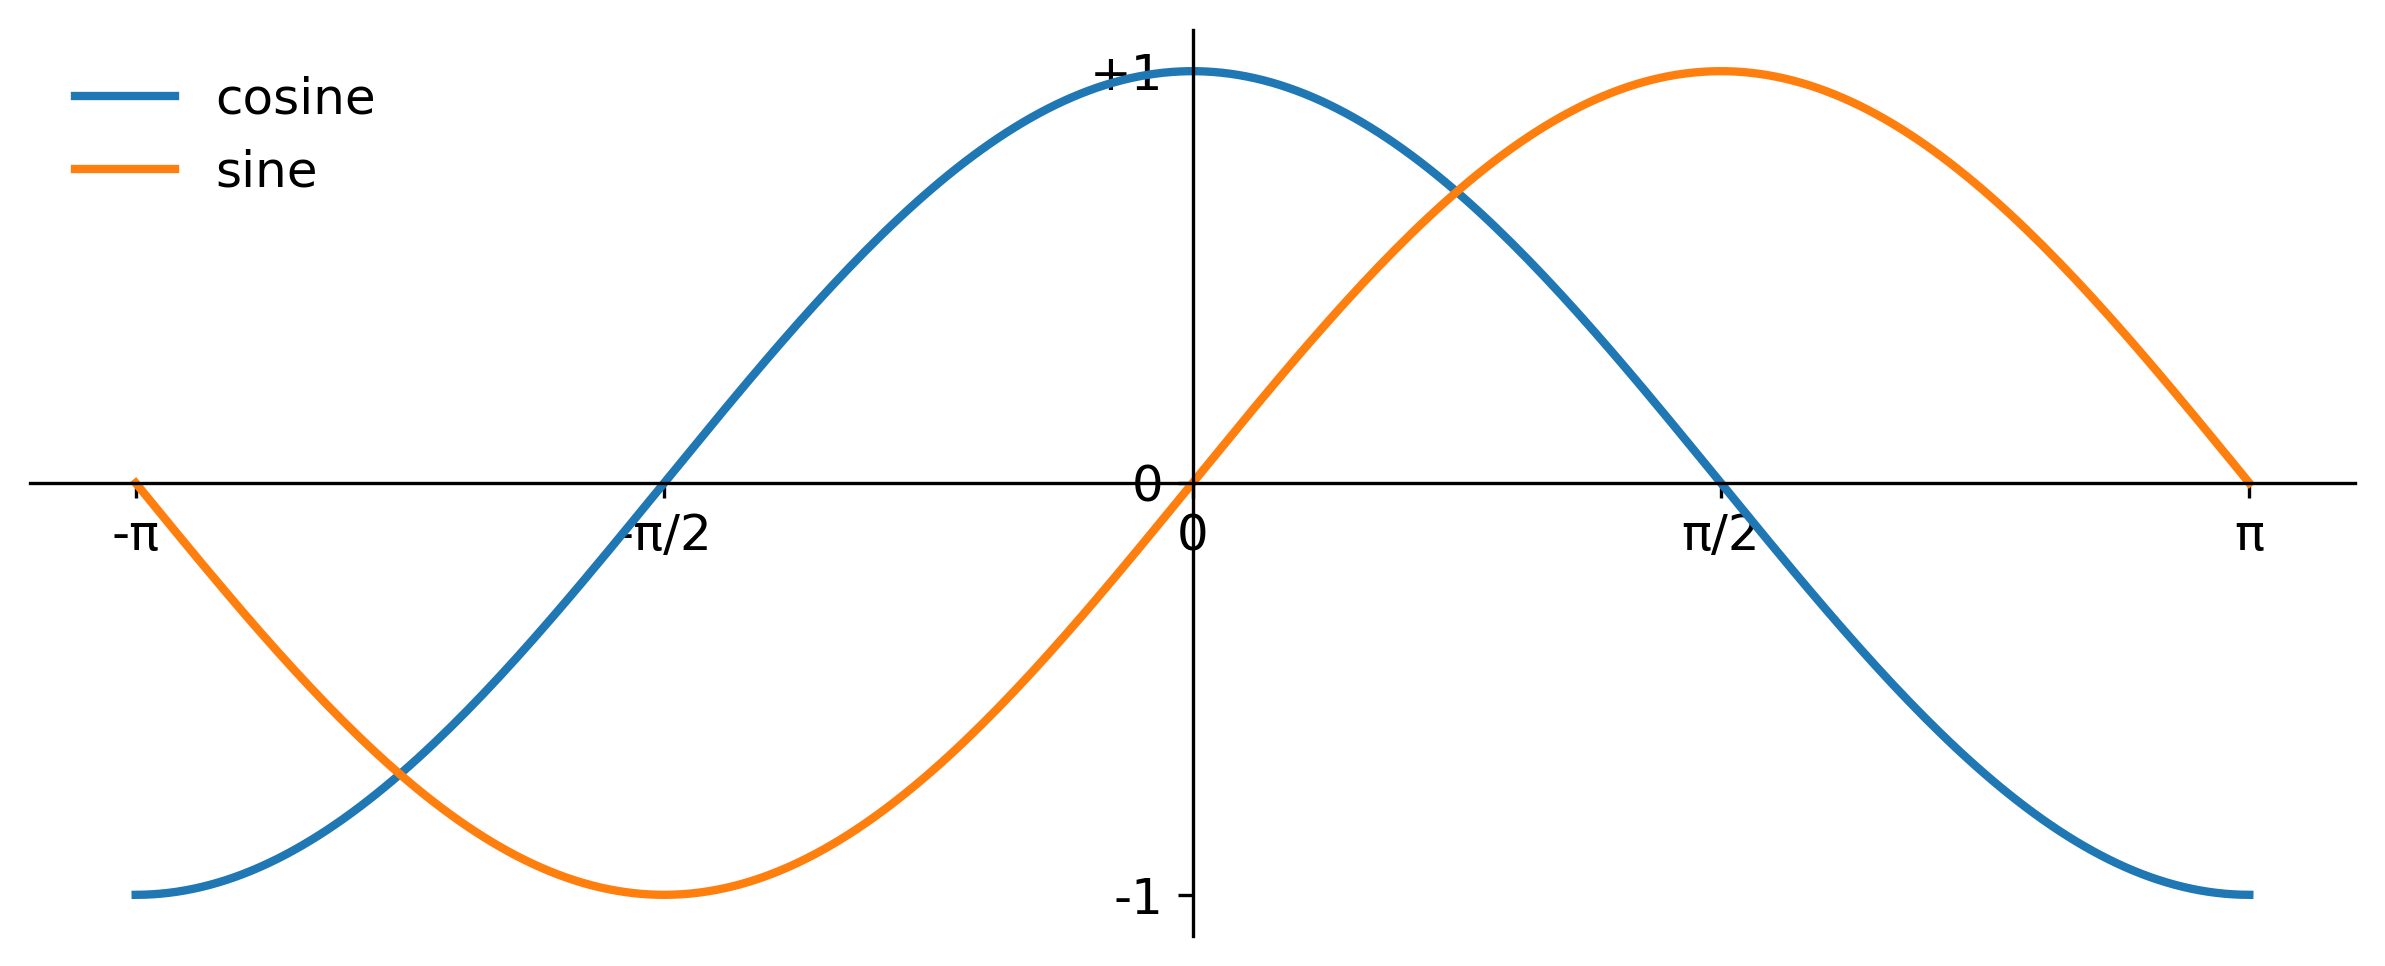

In [10]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

fig = plt.figure(figsize=(10,4),dpi=300)
ax = plt.subplot()

ax.plot(X, C, linewidth=2, label="cosine")
ax.plot(X, S, linewidth=2, label="sine")

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "0", "π/2", "π"])
ax.set_yticks([-1,0,1])
ax.set_yticklabels(["-1", "0", "+1"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper left', frameon=False, fontsize="large")

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize("large")

plt.show()

## Saving results

We can now save our figure in a file using the PDF format. This is a vector format and this means the quality of the figure will be flawless independently of the zoom level.

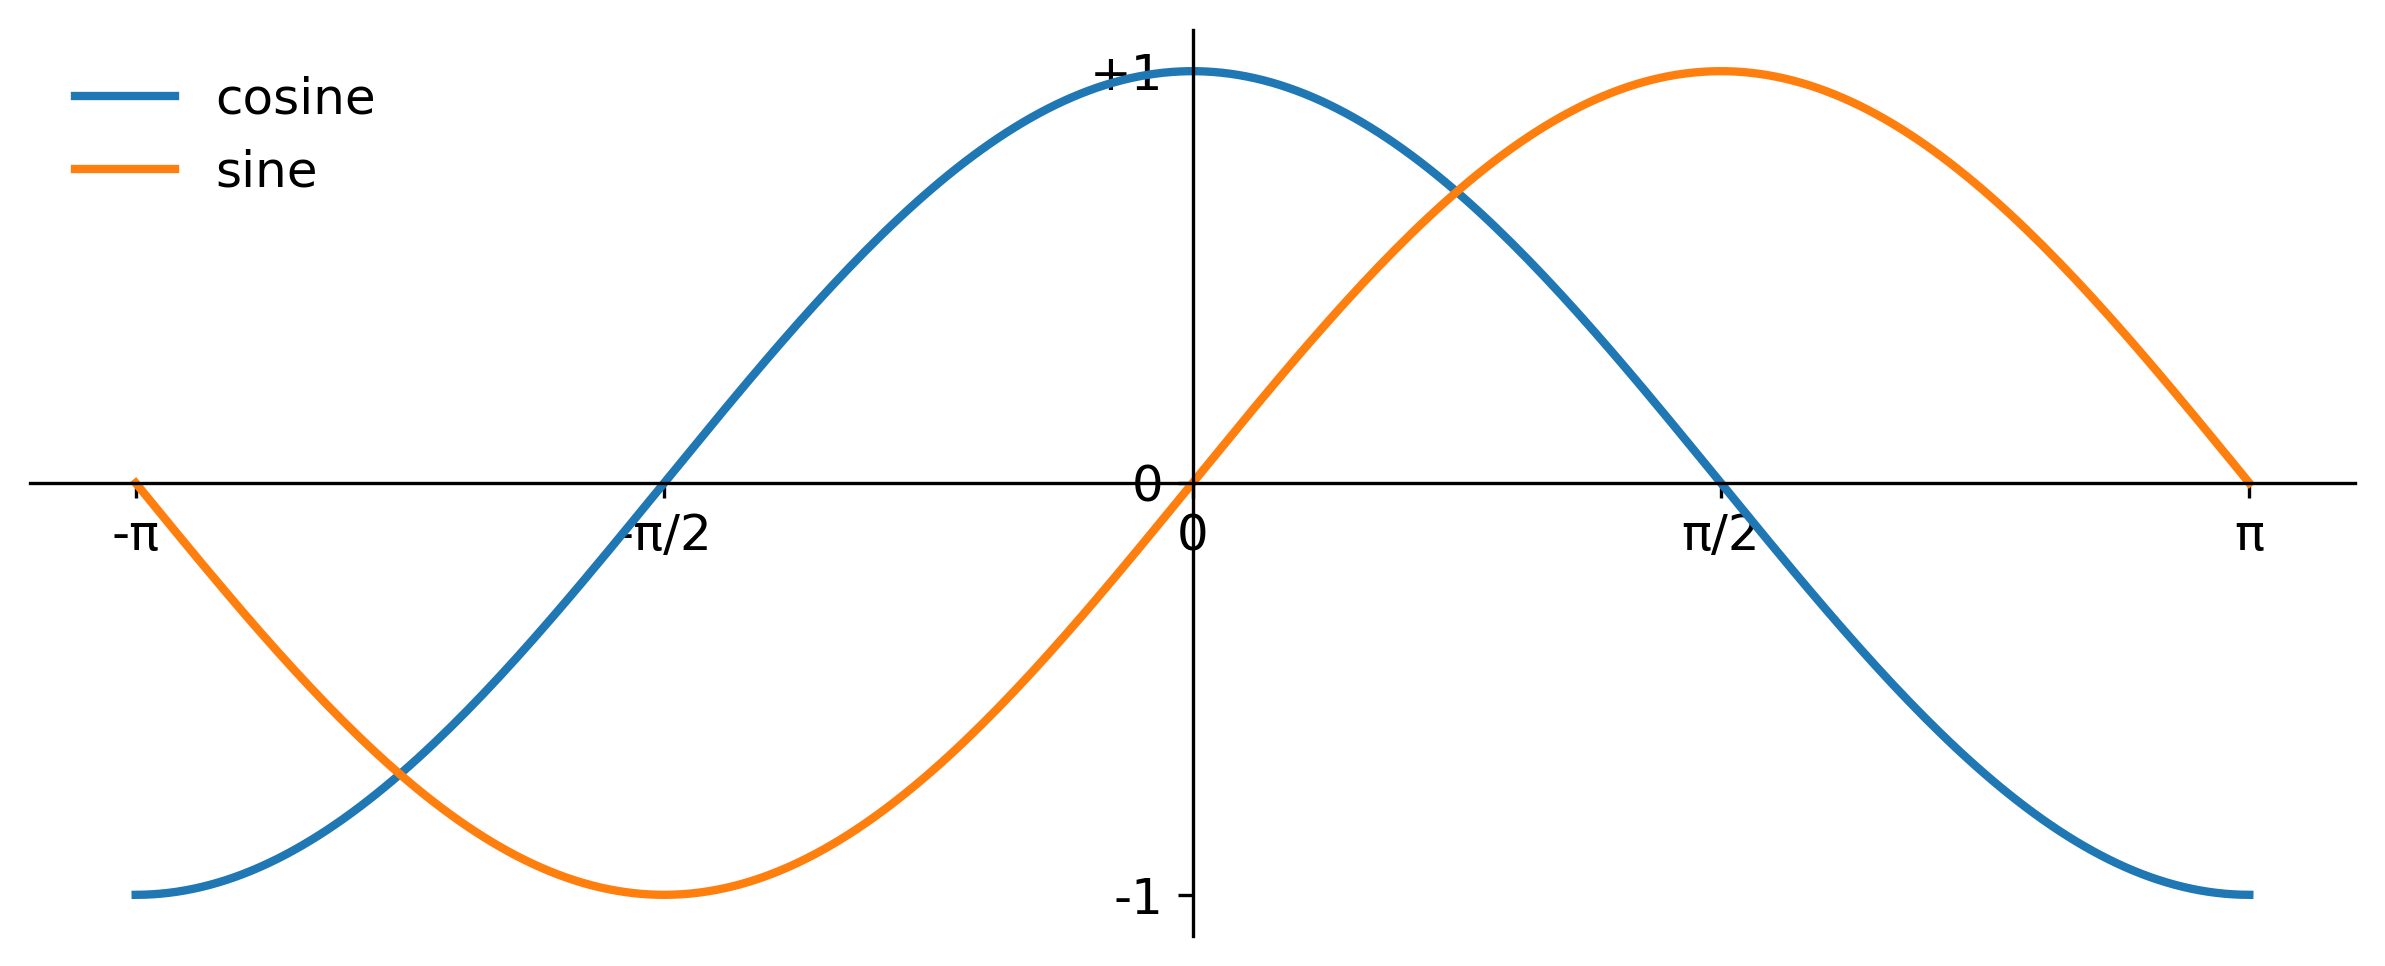

In [11]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

fig = plt.figure(figsize=(10,4),dpi=300)
ax = plt.subplot()

ax.plot(X, C, linewidth=2, label="cosine")
ax.plot(X, S, linewidth=2, label="sine")

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels(["-π", "-π/2", "0", "π/2", "π"])
ax.set_yticks([-1,0,1])
ax.set_yticklabels(["-1", "0", "+1"])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

ax.legend(loc='upper left', frameon=False, fontsize="large")

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    
plt.savefig("01-introduction.pdf")
plt.show()

## Exercise

### Alternative layout

We have decided from the start that we would plot sine and cosine on the same figure but we now want to display sine and cosine on top of each other such that they do not cross. How would you do that and how to ensure the labels on the y axis are right ?


### Better typography

We used π/2 to display pi over two to but it would be better to display $\frac{\pi}{2}$. How would you do modify the x tick labels?


----

**Copyright (c) 2021 Nicolas P. Rougier**  
This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).
<br/>
Code is licensed under a [2-Clauses BSD license](https://opensource.org/licenses/BSD-2-Clause)